In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.cm as cm

In [4]:
train_data = pd.read_csv("C:\\Users\\Firdose Anjum\\OneDrive\\Desktop\\Tech skills\\train.csv\\train.csv")
test_data = pd.read_csv("C:\\Users\\Firdose Anjum\\OneDrive\\Desktop\\Tech skills\\test.csv\\test.csv")

In [5]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_labels = np.array(train_data.loc[:,'label'])
train_data = np.array(train_data.loc[:,train_data.columns!='label'])

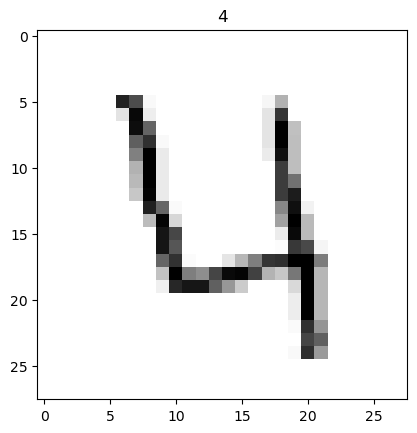

In [7]:
index = 3
plt.title((train_labels[index]))
plt.imshow(train_data[index].reshape(28,28), cmap=cm.binary)
plt.show()

### Data Preprocessing

In [8]:
print("Train data")
y_value = np.zeros((1,10))
for i in range (10):
    print("Occurance of ", i ,"=", np.count_nonzero(train_labels==i))
    y_value[0,i-1]= np.count_nonzero(train_labels==i)

Train data
Occurance of  0 = 4132
Occurance of  1 = 4684
Occurance of  2 = 4177
Occurance of  3 = 4351
Occurance of  4 = 4072
Occurance of  5 = 3795
Occurance of  6 = 4137
Occurance of  7 = 4401
Occurance of  8 = 4063
Occurance of  9 = 4188


In [9]:
y_value

array([[4684., 4177., 4351., 4072., 3795., 4137., 4401., 4063., 4188.,
        4132.]])

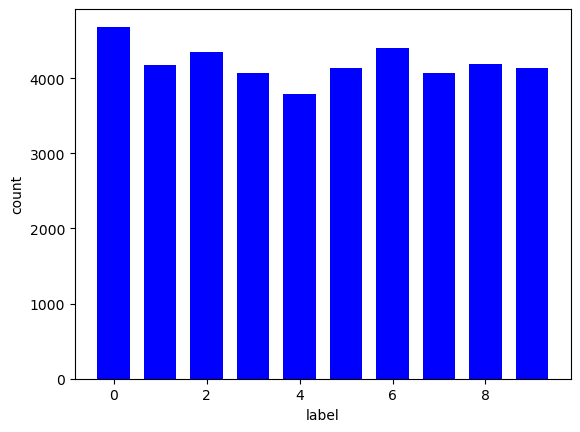

In [10]:
y_value = y_value.ravel() #Similar to .flatten() but does not create a new copy of the data.
x_value = [0,1,2,3,4,5,6,7,8,9]
plt.xlabel('label')
plt.ylabel('count')
plt.bar(x_value, y_value, 0.7, color='b')
plt.show()

In [11]:
train_data.shape

(42000, 784)

In [12]:
train_labels.shape

(42000,)

In [13]:
train_data = np.reshape(train_data,[784,42000])  #42000 images with 784 pixel values (28 * 28)
train_label = np.zeros((10,42000))
for col in range (42000):
    val=train_labels[col]
    for row in range (10):
        if (val==row):
            train_label[val,col]=1
print("train_data shape="+str(np.shape(train_data)))
print("train_label shape="+str(np.shape(train_label)))

train_data shape=(784, 42000)
train_label shape=(10, 42000)


In [14]:
print(train_label)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### Activation Functions

In [15]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    A = np.maximum(0,Z)    
    cache = Z 
    return A, cache

def softmax(Z):
    e_x = np.exp(Z)
    A = e_x / np.sum(np.exp(Z))  
    cache = Z
    return A,cache   

### Derivative of Activation Functions

In [16]:
def sigmoid_backward(dA, cache):    # dA = (d(loss)/d(activation)) * (d(activation)/d(Z))
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

In [17]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

In [18]:
def softmax_backward(Z,cache):
    Z=cache
    length=10  
    dZ=np.zeros((42000,10))
    Z=np.transpose(Z)
    for row in range (0,42000):
            denominator=(np.sum(np.exp(Z[row,:])))*(np.sum(np.exp(Z[row,:])))
            for col in range (0,10):
                sums=0
                for j in range (0,10):
                    if (j!=col):
                        sums=sums+(math.exp(Z[row,j]))
                
                dZ[row,col]=(math.exp(Z[row,col])*sums)/denominator           
    dZ=np.transpose(dZ)
    Z=np.transpose(Z)

    assert (dZ.shape == Z.shape)
    return dZ

### Initialization of weights of and bias

In [25]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(2)
    parameters = {}
    L = len(layer_dims)            
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) 
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    
    return parameters

* Why divide by √layer_dims[l-1]?
- This is Xavier initialization (for tanh) or similar to He initialization (for ReLU).
- Purpose: Keep the variance of activations stable across layers (avoid exploding/vanishing gradients).
- Without it, deeper networks often fail to train.

In [26]:
parameters = initialize_parameters_deep([5,4,3])

In [27]:
parameters

{'W1': array([[-0.18637978, -0.02516329, -0.95533594,  0.73355141, -0.80204878],
        [-0.37644087,  0.22489541, -0.55690976, -0.47313062, -0.40652056],
        [ 0.24661775,  1.02510659,  0.01857698, -0.49995146,  0.24107421],
        [-0.26661072, -0.00855542,  0.52547652, -0.33445806,  0.00403621]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[-0.43905395, -0.07821709,  0.12828523, -0.49438952],
        [-0.16941098, -0.11809202, -0.31882751, -0.59380614],
        [-0.71060861, -0.0767476 , -0.13452848,  1.11568339]]),
 'b2': array([[0.],
        [0.],
        [0.]])}

### Forward propagation

The N hidden layers are using 'relu' while the output layer is using 'softmax' to generate output.

In [28]:
def linear_forward(A, W, b):
    Z = np.dot(W,A) +b
    cache = (A, W, b)
    assert(Z.shape == (W.shape[0], A.shape[1]))
    return Z, cache

In [30]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    elif activation == "softmax":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)
        
    cache = (linear_cache, activation_cache)
    return A, cache

In [31]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "softmax")
    caches.append(cache)               
    return AL, caches

### Cost calculation

In [32]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))  #cross - entropy
    return cost

### Back-propagation

In [33]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1./m * np.dot(dZ,A_prev.T)  
    db = (1/m)*np.sum(dZ, axis=1, keepdims=True);
    dA_prev = np.dot(W.T,dZ)
    return dA_prev, dW, db

In [34]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)  
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "softmax":
        dZ = softmax_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

In [35]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) 
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    M=len(layers_dims)
    current_cache = caches[M-2]
    grads["dA"+str(M-1)], grads["dW"+str(M-1)], grads["db"+str(M-1)] = linear_activation_backward(dAL, current_cache, activation = "softmax")#M-1
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    
    return grads

### Gradient descent/Update parameters

In [36]:
def update_parameters(parameters, grads, learning_rate):
    for l in range(len_update-1):
        parameters["W" + str(l+1)] =parameters["W" + str(l+1)] - (learning_rate*grads["dW" + str(l+1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate*grads["db" + str(l+1)])
    return parameters

### Cost 

In [38]:
def plot_graph(cost_plot):
       
    x_value=list(range(1,len(cost_plot)+1))
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.plot(x_value,cost_plot,0.,color='g')

### Architecture

In [39]:
layers_dims = [784,500,400,300,100,10] #  n-layer model (n=6 including input and output layer)
len_update = len(layers_dims)

In [40]:
def L_layer_model(X, Y, layers_dims, learning_rate , num_iterations , print_cost=False):
    print("training...")
    costs = []  
    cost_plot=np.zeros(num_iterations)
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost =compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate) 
        cost_plot[i]=cost;
    
    plot_graph(cost_plot)
    return parameters

training...
training done


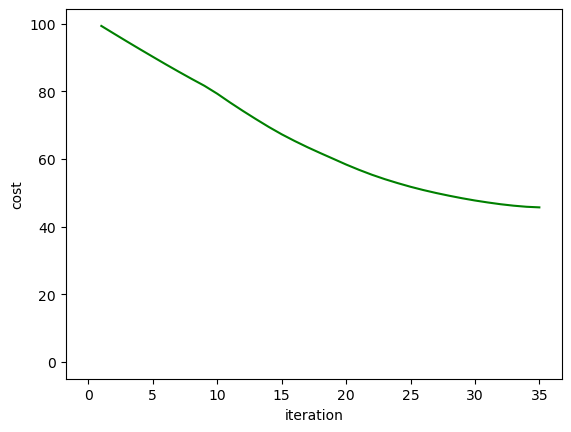

In [41]:
parameters = L_layer_model(train_data, train_label, layers_dims,learning_rate = 0.0005, num_iterations =35 , print_cost = True) 
print("training done")